<a href="https://colab.research.google.com/github/Ahmed-Ashraf-Marzouk/data-mining-heart-attack/blob/main/Data_Mining_Project_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

# from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score, roc_curve, auc, plot_roc_curve, precision_score, recall_score

# Loading the Data

In [3]:
!gdown "1uDSWhhUBPFjjUJmsh4-FLiRM2AakrC8f"
!unrar x "./dataset.rar" -idq

Downloading...
From: https://drive.google.com/uc?id=1uDSWhhUBPFjjUJmsh4-FLiRM2AakrC8f
To: /content/dataset.rar
100% 3.82k/3.82k [00:00<00:00, 4.51MB/s]


In [4]:
# Cleaned Dataset
!gdown "1OTQN_nYkoi08tBctdl_JdslqnbNqMoeS"

Downloading...
From: https://drive.google.com/uc?id=1OTQN_nYkoi08tBctdl_JdslqnbNqMoeS
To: /content/cleaned_data.csv
100% 12.4k/12.4k [00:00<00:00, 12.2MB/s]


# Data Preprocessing

## Data Wrangling

### Column Description
1. **age** : Age of the patient
2. **Gender** : Sex of the patient
3. **exang**: exercise induced angina (1 = yes; 0 = no)
4. **ca**: number of major vessels (0-3)
5. **cp** : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

6. **trtbps** : resting blood pressure (in mm Hg)
7. **chol** : cholestoral in mg/dl fetched via BMI sensor
8. **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false
9. **rest_ecg** : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10. **thalach** : maximum heart rate achieved


11. **oldpeak** : Previous peak

12. **slp** : Slope

13. **thall** : Thal rate

14. **Output** : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
col_names = ['Age','Gender','CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Exang', 'Old_peak', 'Slope', 'CA', 'Thall', 'Output']
df = pd.read_csv('dataset/heart.csv', header = 0, names = col_names)
rearranged_col_names = ['Age', 'Gender', 'Exang', 'CA', 'CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Old_peak', 'Slope','Thall', 'Output']
df = df[rearranged_col_names]
df.head()

,Age,Gender,Exang,CA,CP,Trtbps,Chol,FBS,Rest_ecg,Thalach,Old_peak,Slope,Thall,Output
0,63,1,0,0,3,145,233,1,0,150,2.3,0,1,1
1,37,1,0,0,2,130,250,0,1,187,3.5,0,2,1
2,41,0,0,0,1,130,204,0,0,172,1.4,2,2,1
3,56,1,0,0,1,120,236,0,1,178,0.8,2,2,1
4,57,0,1,0,0,120,354,0,1,163,0.6,2,2,1




---



### Checking the Data

In [6]:
df.info() # No null values in dataset
# 303 Examples
# 14 Features
# (303) X (14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Gender    303 non-null    int64  
 2   Exang     303 non-null    int64  
 3   CA        303 non-null    int64  
 4   CP        303 non-null    int64  
 5   Trtbps    303 non-null    int64  
 6   Chol      303 non-null    int64  
 7   FBS       303 non-null    int64  
 8   Rest_ecg  303 non-null    int64  
 9   Thalach   303 non-null    int64  
 10  Old_peak  303 non-null    float64
 11  Slope     303 non-null    int64  
 12  Thall     303 non-null    int64  
 13  Output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()
# Gender range between 29 and 77 which is acceptable range
# Number of major vessales (column name CA) should be between 0 and 3, but 4 can be found.
# Resting blood pressure (column name Trtbps) have a maximum value of 200 mm Hg, is this possible?
# Maximum heart rate achieved (column name Thalach) have a maximum value of 202 units, is this possible?

,Age,Gender,Exang,CA,CP,Trtbps,Chol,FBS,Rest_ecg,Thalach,Old_peak,Slope,Thall,Output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.326733,0.729373,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,2.313531,0.544554
std,9.082101,0.466011,0.469794,1.022606,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,0.612277,0.498835
min,29.000000,0.000000,0.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,2.000000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,2.000000,1.000000
75%,61.000000,1.000000,1.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,3.000000,1.000000
max,77.000000,1.000000,1.000000,4.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,3.000000,1.000000


In [8]:
df['Output'].value_counts(normalize=True) # Each class is about 50%

1    0.544554
0    0.455446
Name: Output, dtype: float64

# Explatory Data Analysis (EDA)


## Outlier detection and removal

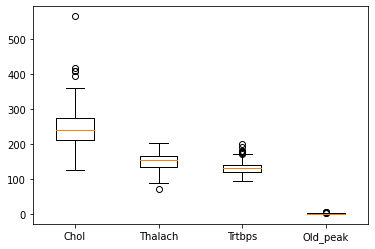

In [9]:
# selected columns before removing outliers
arr = [df['Chol'].to_numpy(), df['Thalach'].to_numpy(), df['Trtbps'].to_numpy(), df['Old_peak'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3, 4], ['Chol', 'Thalach', 'Trtbps', 'Old_peak'])
plt.show()

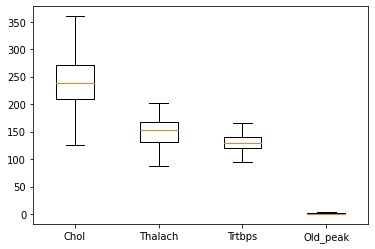

In [11]:
# Cleaned data after removing outliers
df_cleaned = df.loc[df['Chol'] < 380]
df_cleaned = df_cleaned.loc[df_cleaned['Thalach'] > 80]
df_cleaned = df_cleaned.loc[df_cleaned['Trtbps'] < 170]
df_cleaned = df_cleaned.loc[df_cleaned['Old_peak'] < 3.5]
arr = [df_cleaned['Chol'].to_numpy(), df_cleaned['Thalach'].to_numpy(), df_cleaned['Trtbps'].to_numpy(), df_cleaned['Old_peak'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3, 4], ['Chol', 'Thalach', 'Trtbps', 'Old_peak'])
plt.show()

## Denisty graph for our contrinous features with respect to output

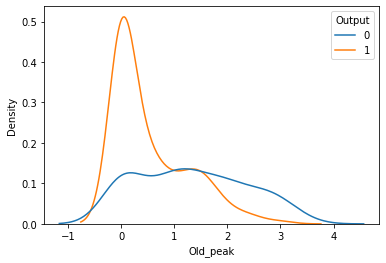

In [12]:
sns.kdeplot(df_cleaned['Old_peak'], hue = df_cleaned['Output'])
plt.show()

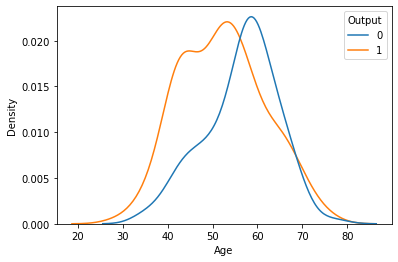

In [13]:
sns.kdeplot(df_cleaned['Age'], hue = df_cleaned['Output'])
plt.show()

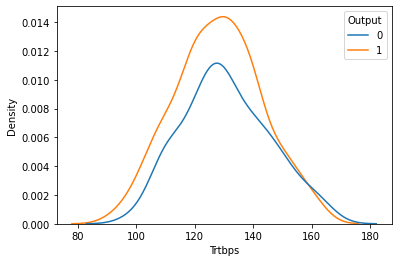

In [14]:
sns.kdeplot(df_cleaned['Trtbps'], hue = df_cleaned['Output'])
plt.show()

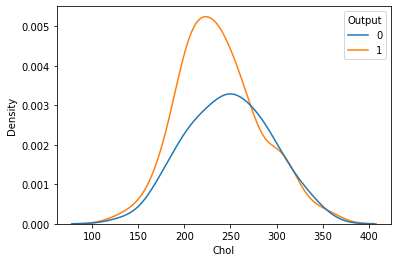

In [15]:
sns.kdeplot(df_cleaned['Chol'], hue = df_cleaned['Output'])
plt.show()

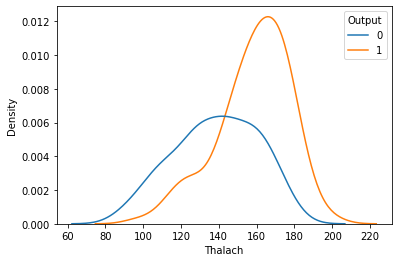

In [16]:
sns.kdeplot(df_cleaned['Thalach'], hue = df_cleaned['Output'])
plt.show()

## Correlation matrix

Correlation matrix helps us to detect correlated features in our data set. So, we can remove strongly correlated data with small effect on our final machine learning model. 

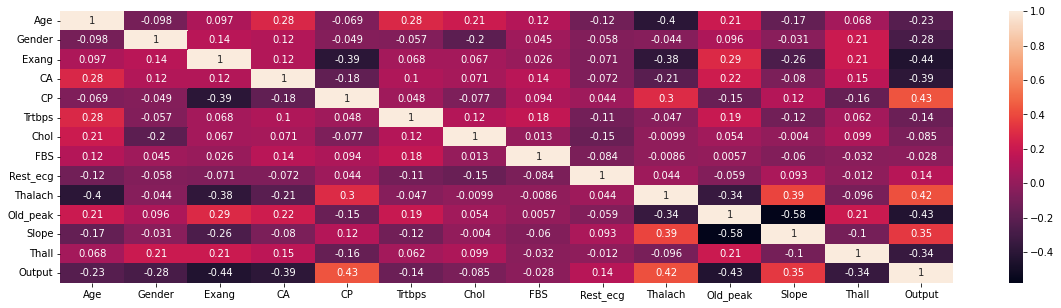

In [17]:
corrMatrix = df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corrMatrix, annot=True);
# df['FBS']

## Data visualization

No handles with labels found to put in legend.


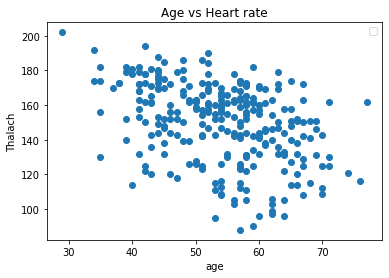

In [18]:
# scatter plot between $age and $heart_rate
age_x = df_cleaned['Age']
heart_rate_y = df_cleaned['Thalach'] 
plt.scatter(age_x, heart_rate_y)
plt.xlabel('age')
plt.ylabel('Thalach')
plt.title('Age vs Heart rate')
plt.legend()
plt.show()
# From graph below we can see that age is inversely correlated with heart rate. When age increases heart rate decreases.

1    190
0     83
Name: Gender, dtype: int64


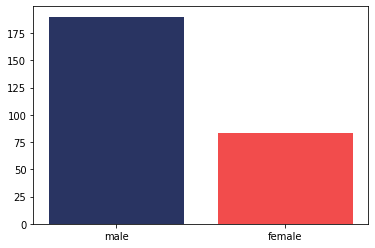

In [19]:
# assume that 0: female and 1: male
count = df_cleaned['Gender'].value_counts()
print(count)
plt.bar(['male', 'female'], count, color=['#293462', '#F24C4C'])
plt.show()
# according to the graph our data has more men than women, which may lead to bias towards men in our machine learning detection model

In [20]:
# sns.pairplot(df)

# Saving the Cleaned Data Frame

In [21]:
from os.path import exists

##############################################################################################################
##                                                                                                          ##
##      Ignore this, Change file_path, file_name, and df_to_save then run the cell and wait for output.     ##
def save_df(local_path, file_name, df_to_save):
    overwrite = True

    if not(exists('/content/' + local_path)):
        overwrite = False
        print(f"\n!! Saving failed, path to folder does not exist, {'/content/' + local_path}")

    if(exists(local_path+file_name)):
        try:
            overwrite = int(input('This file already exists!\n\nDo you wish to overwrite it? [1]Yes, [0]No:  '))
        except:
            overwrite = False
            print("\n!! Saving failed, please enter either 1 or 0.")



    if(overwrite == 1):
        print(f"\n\nFile Saved to {'/content/' + local_path + file_name}")
        df_to_save.to_csv('/content/' + local_path + file_name)
    else:
        print('\n\nNo Changes')
##                                                                                                          ##
##############################################################################################################

local_path = './' # must end with '/'
# this folder must exists with the Google Colab 'content' folder (the default one)
# if it does not, then create it manualy.

file_name = 'cleaned_data.csv'
# the name of the csv file

df_to_save = df.copy()
# The name of the df to save

save_df(local_path, file_name, df_to_save) # Check output.
# download locally if needed


This file already exists!

Do you wish to overwrite it? [1]Yes, [0]No:  

!! Saving failed, please enter either 1 or 0.


No Changes


---
---

# Bayesian Classifier

## Extractig Features and Labels

In [22]:
df = pd.read_csv('dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Column Names

In [23]:
# Column Names
cols = df.columns
print(f'Column Names {[x for x in cols]}')

Column Names ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


### Features

In [24]:
features = df[cols[:-1]]
features

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### Labels

In [25]:
labels = df[cols[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

### Splitting into Testing and Training (20% Testing 80% Training)

In [26]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)
print(f'Training Features {features_train.shape}', 
      f'\nTraining Labels{labels_train.shape}', 
      f'\n\nTesting Features{features_test.shape}', 
      f'\nTesting labels{labels_test.shape}')

Training Features (242, 13) 
Training Labels(242,) 

Testing Features(61, 13) 
Testing labels(61,)


## Building the Model

### Training

In [27]:
gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(features_train, labels_train)

GaussianNB()

### Predicting

In [28]:
label_predictions = gaussianNaiveBayes.predict(features_test)
label_predictions.shape

(61,)

### Accuracy

In [29]:
print(f"Out of {features_test.shape[0]} examples, {(labels_test != label_predictions).sum()} where miscalassified")
print(f"This gives us an accuracy of {accuracy_score(labels_test, label_predictions) * 100:.3f}%")

Out of 61 examples, 9 where miscalassified
This gives us an accuracy of 85.246%


# Decision Tree Classifier

## Exploratory data analysis (EDA)


In [30]:
df = pd.read_csv('dataset/heart.csv')

In [31]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Splitting into Testing and Training 

In [33]:
X = df.drop('output',axis=1)
y = df['output']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Gini Criterion (default)


In [35]:
model = DecisionTreeClassifier()

In [36]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
base_pred = model.predict(X_test)

In [38]:
confusion_matrix(y_test,base_pred)

array([[23,  8],
       [ 4, 26]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


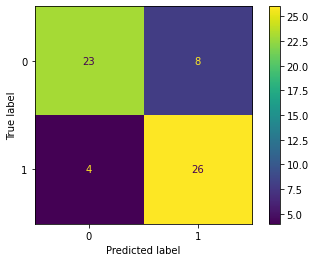

In [39]:
plot_confusion_matrix(model,X_test,y_test);

In [40]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.76      0.87      0.81        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [41]:
model.feature_importances_

array([0.11902916, 0.0488414 , 0.28698006, 0.08500814, 0.07663507,
       0.0223376 , 0.        , 0.06111892, 0.06639682, 0.05377946,
       0.03774575, 0.11684968, 0.02527793])

In [42]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values(by=['Feature Importance'])

,Feature Importance
restecg,0.000000
fbs,0.022338
thall,0.025278
slp,0.037746
sex,0.048841
oldpeak,0.053779
thalachh,0.061119
exng,0.066397
chol,0.076635
trtbps,0.085008


## **Tree** *Visualization*

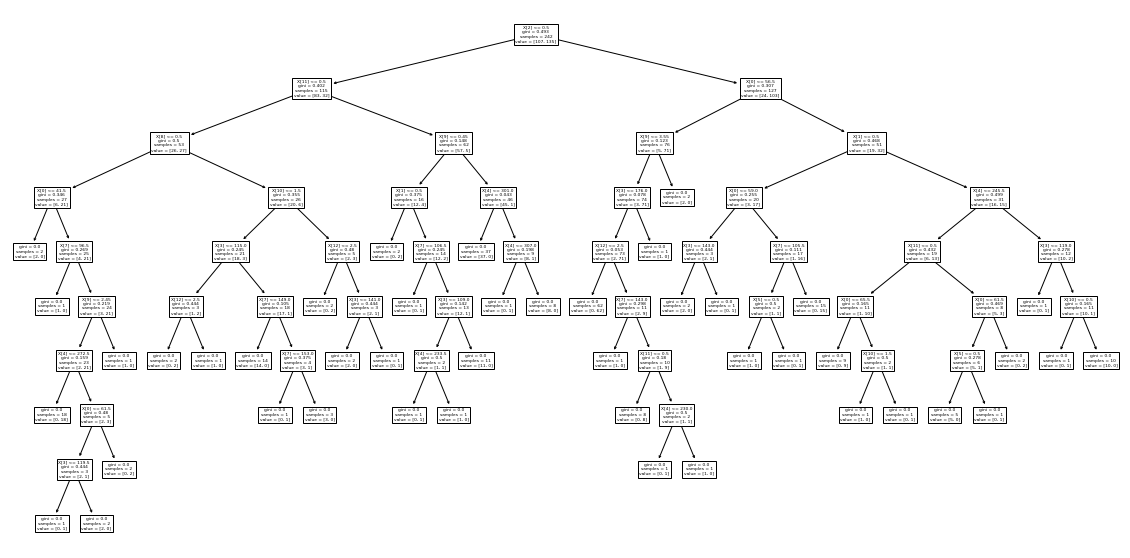

In [43]:
plt.figure(figsize=(20,10))
plot_tree(model);

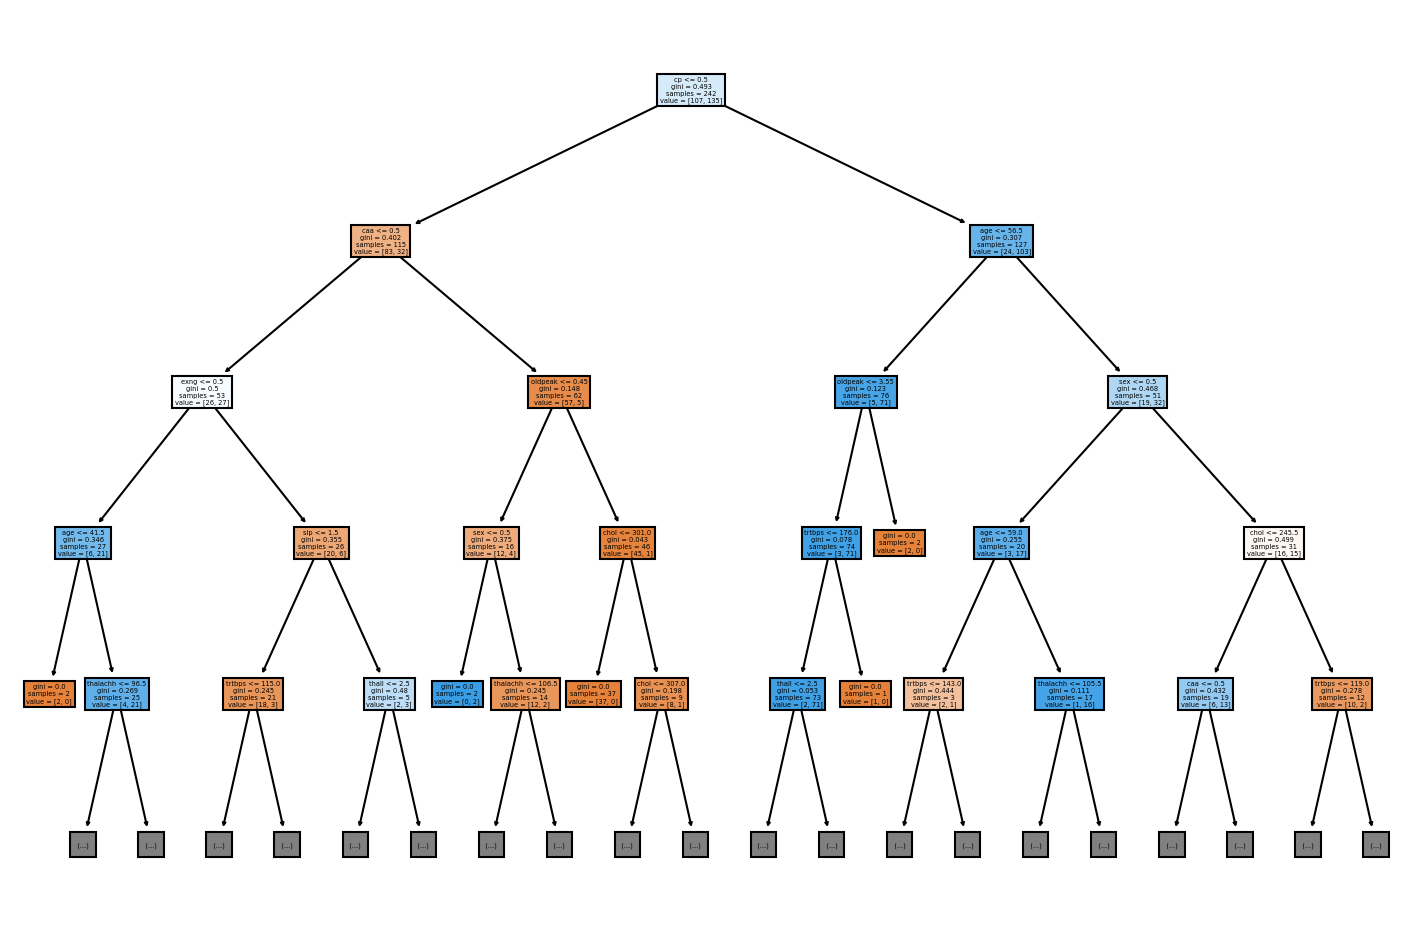

In [44]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,max_depth=4,filled=True,feature_names=X.columns);

## Pruning the tree and Reporting Model Results

In [45]:
# function to print the classification report and plot the tree
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [46]:
pruned_tree = DecisionTreeClassifier(max_depth=4)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

              precision    recall  f1-score   support

           0       0.88      0.68      0.76        31
           1       0.73      0.90      0.81        30

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.78        61
weighted avg       0.80      0.79      0.78        61





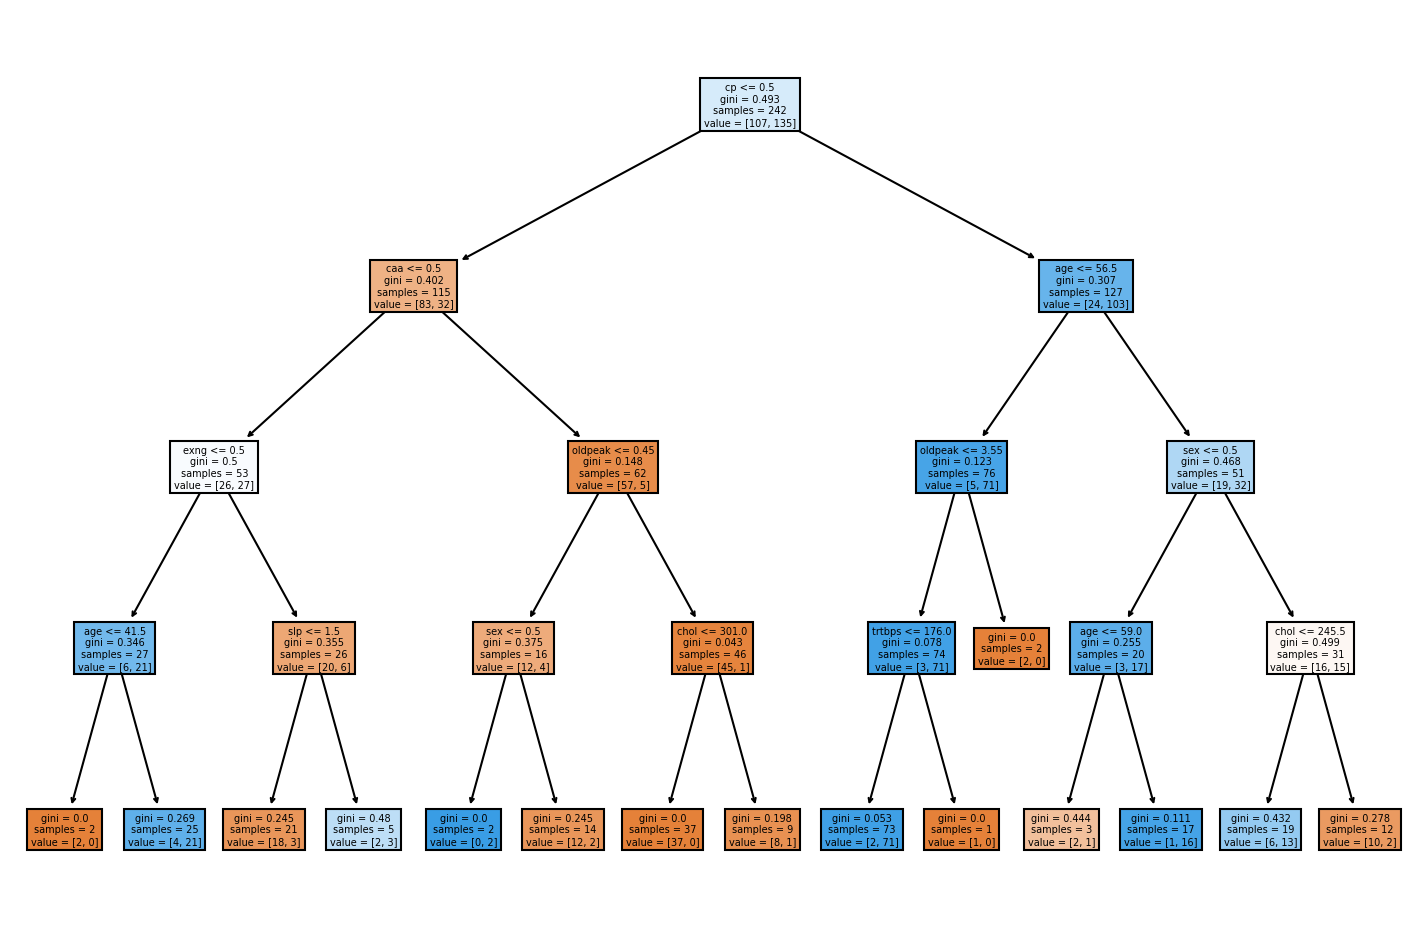

In [47]:
report_model(pruned_tree)

##Max Leaf Nodes

In [48]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

           0       0.86      0.61      0.72        31
           1       0.69      0.90      0.78        30

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61





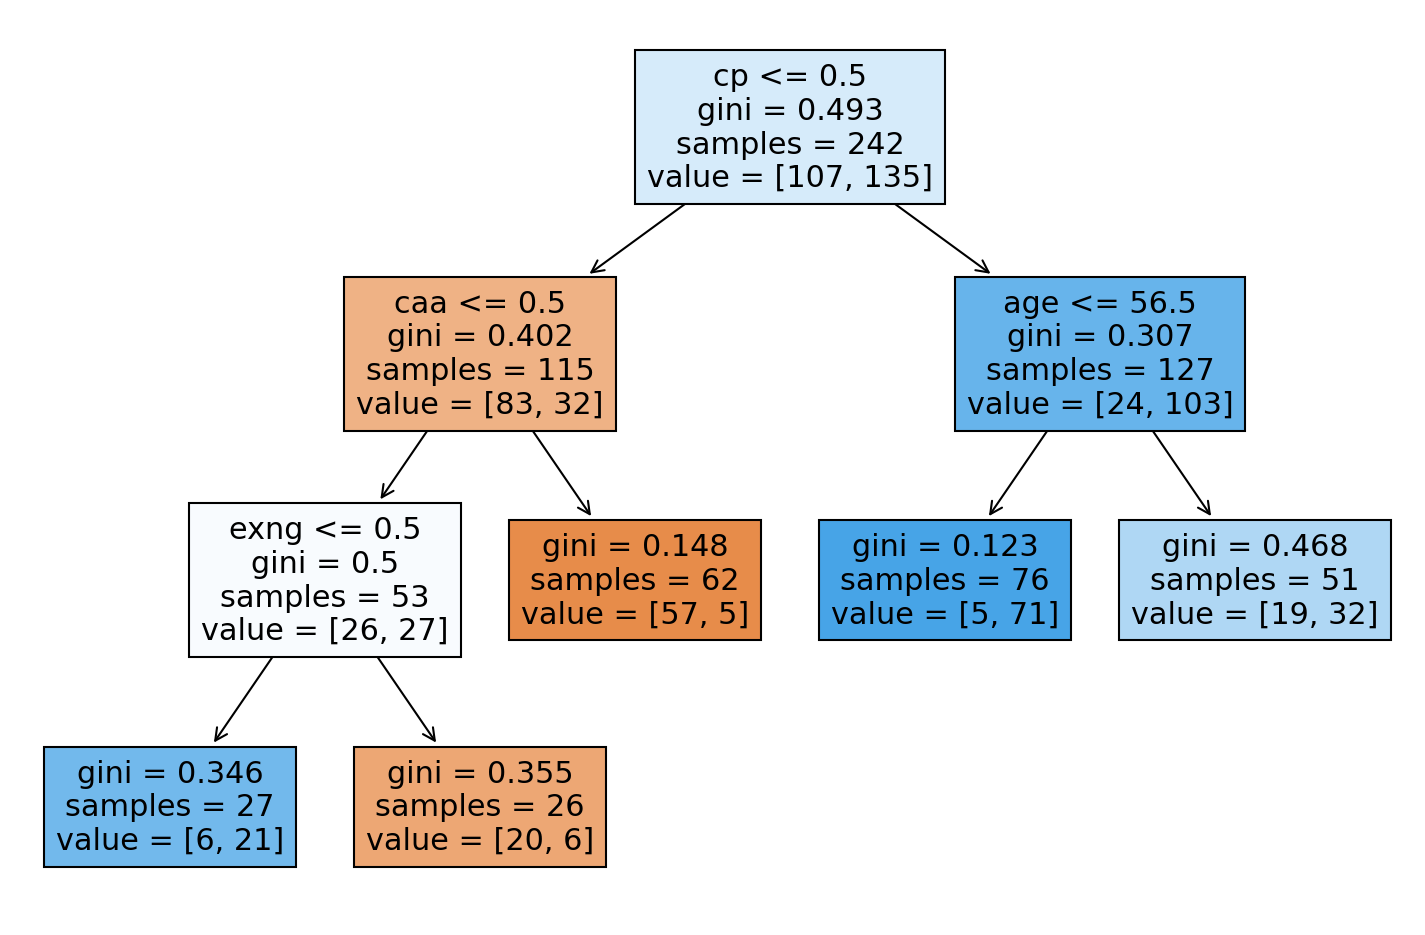

In [49]:
report_model(pruned_tree)

## Entropy Criterion

In [50]:
entropy_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.74      0.87      0.80        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61





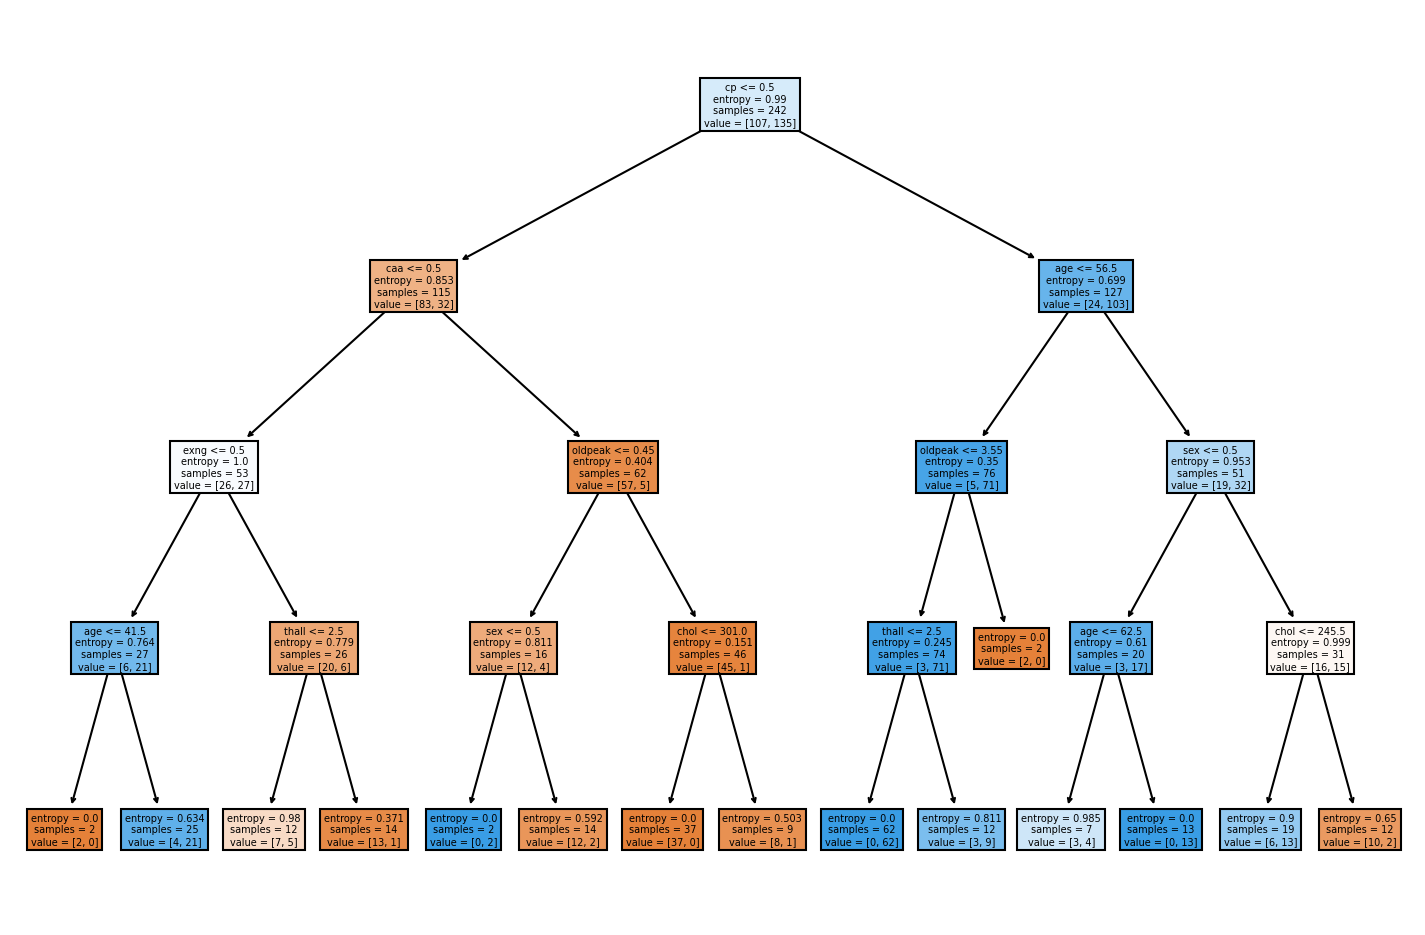

In [51]:
report_model(entropy_tree)

In [52]:
# %%shell
# jupyter nbconvert --to html /content/DT.ipynb

# K-Means

## Data wrangling 

In [61]:
col_names = ['Age','Gender','CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Exang', 'Old_peak', 'Slope', 'CA', 'Thall', 'Output']
df = pd.read_csv('dataset/heart.csv', header = 0, names = col_names)
rearranged_col_names = ['Age', 'Gender', 'Exang', 'CA', 'CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Old_peak', 'Slope','Thall', 'Output']
df = df[rearranged_col_names]
df.head()
df.shape

(303, 14)

## Model

### Standardization of continous data

In [62]:
y = df['Output']
features = df.iloc[:,0:-1]
#standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### K means model generation and prediction 

In [63]:
kmeans = KMeans(init="random", n_clusters= 2, n_init=10, max_iter=300, random_state=42)
y_predict = kmeans.fit_predict(scaled_features)

In [64]:
kmeans.inertia_
kmeans.n_iter_

10

In [65]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

### Performance metrics 

In [66]:
confusion_matrix(y, y_predict)


array([[ 93,  45],
       [ 12, 153]])

In [67]:
accuracy_score(y,y_predict)


0.8118811881188119

In [68]:
f1_score(y, y_predict, average=None)

array([0.7654321 , 0.84297521])

In [69]:
# percision, Recall, F1-score

Precision = precision_score(y, y_predict)
Recall = recall_score(y, y_predict)
F1_score =f1_score(y, y_predict)

print('Precision: %.3f' % Precision)
print('Recall: %.3f' % Recall)
print('F1_Score: %.3f' % F1_score )

Precision: 0.773
Recall: 0.927
F1_Score: 0.843


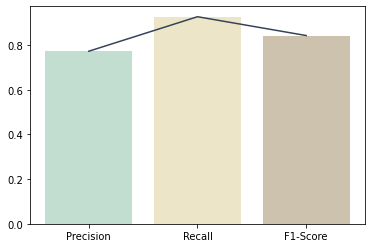

In [70]:
plt.bar(['Precision', 'Recall', 'F1-Score'],[Precision, Recall, F1_score], color =['#C2DED1', '#ECE5C7', '#CDC2AE'])
plt.plot(['Precision', 'Recall', 'F1-Score'],[Precision, Recall, F1_score], color = '#354259')

## Kmeans with outlier removal

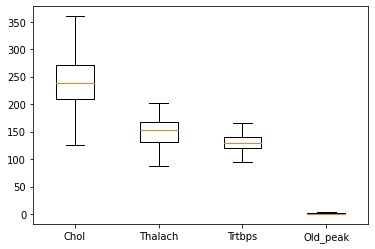

In [71]:
# Cleaned data after removing outliers
df_no_outliers = df.loc[df['Chol'] < 380]
df_no_outliers = df_no_outliers.loc[df_no_outliers['Thalach'] > 80]
df_no_outliers = df_no_outliers.loc[df_no_outliers['Trtbps'] < 170]
df_no_outliers = df_no_outliers.loc[df_no_outliers['Old_peak'] < 3.5]
arr = [df_no_outliers['Chol'].to_numpy(), df_no_outliers['Thalach'].to_numpy(), df_no_outliers['Trtbps'].to_numpy(), df_no_outliers['Old_peak'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3, 4], ['Chol', 'Thalach', 'Trtbps', 'Old_peak'])
plt.show()

In [72]:
df_no_outliers.shape

(273, 14)

In [73]:
y = df_no_outliers['Output']
features = df_no_outliers
#standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [74]:
kmeans = KMeans(init="random", n_clusters= 2, n_init=10, max_iter=300, random_state=42)
# kmeans.decision_function(scaled_features)
y_predict = kmeans.fit_predict(scaled_features)

In [75]:
kmeans.inertia_
kmeans.n_iter_

9

In [76]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

### Performance metrics with outlier removal 

In [77]:
confusion_matrix(y, y_predict)


array([[102,  14],
       [  7, 150]])

In [78]:
accuracy_score(y,y_predict)


0.9230769230769231

In [79]:
# percision, Recall, F1-score

Precision = precision_score(y, y_predict)
Recall = recall_score(y, y_predict)
F1_score =f1_score(y, y_predict)

print('Precision: %.3f' % Precision)
print('Recall: %.3f' % Recall)
print('F1_Score: %.3f' % F1_score )

Precision: 0.915
Recall: 0.955
F1_Score: 0.935


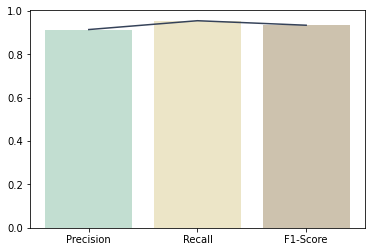

In [80]:
plt.bar(['Precision', 'Recall', 'F1-Score'],[Precision, Recall, F1_score], color =['#C2DED1', '#ECE5C7', '#CDC2AE'])
plt.plot(['Precision', 'Recall', 'F1-Score'],[Precision, Recall, F1_score], color = '#354259')

# Downloading

In [81]:
%%shell
jupyter nbconvert --to html /content/Data_Mining_Project_Ensemble.ipynb

[NbConvertApp] WARNING | pattern '/content/Data_Mining_Project_Ensemble.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ

CalledProcessError: ignored